# Introducción al aprendizaje automático 

## K-means (clustering the filas)

Ejemplo de partida: generamos valores aleatorios del tiempo de paso entre paradas de una línea e autobuses a distintas horas del día

## Creamos los datos

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = "C:/Users/pablo/git/Solar/Clustering/2016-01-norm_missing_by_avg.csv"
# path= "C:/Users/pablo/git/Solar/Fotos/201601051108/medidas.csv"
# path = "C:/Users/pablo/git/Solar/Clustering/allCenters.csv"
#path = "E:/rafa/docencia/1718/tfm/solar/data/cieloclaro/datos/2015-07-norm_missing_by_avg.csv"
import pandas as pd
df = pd.read_csv(path)
feat_cols = ["AFRISOL", 	"CESA", 	"DISS", 	"PSA", 	"TSA", 	"KONTAS", 	"BSRN"]
# feat_cols = ["min", "max","mean","std"]

df["max"] =  df[feat_cols].max(axis=1)
df["min"] =  df[feat_cols].min(axis=1)
df["mean"] =  df[feat_cols].mean(axis=1)
df["std"] =  df[feat_cols].std(axis=1)
feat_cols = ["max","min","mean","std"]
df.head()


,ID,DIA,HORA,TIMESTAMP,AFRISOL,CESA,DISS,PSA,TSA,KONTAS,BSRN,max,min,mean,std
0,1-9,1,9.00,1,0.667081,0.669512,0.667081,0.685846,0.667081,0.667081,0.645886,0.685846,0.645886,0.667081,0.011599
1,1-9.02,1,9.02,1,0.657675,0.659924,0.657675,0.676378,0.657675,0.657675,0.636725,0.676378,0.636725,0.657675,0.011502
2,1-9.03,1,9.03,1,0.648837,0.650823,0.648837,0.667388,0.648837,0.648837,0.628299,0.667388,0.628299,0.648837,0.011328
3,1-9.05,1,9.05,1,0.639912,0.641172,0.639912,0.657750,0.639912,0.639912,0.620813,0.657750,0.620813,0.639912,0.010682
4,1-9.07,1,9.07,1,0.639531,0.640715,0.639531,0.657485,0.639531,0.639531,0.620392,0.657485,0.620392,0.639531,0.010724


In [21]:
# gráfico de bigotes para la última parada
import seaborn as sns
# sns.violinplot(x=df['std'])
# sns.violinplot(x=df['mean'])
# sns.kdeplot(x=df['std'],y=df['std'])
sns.kdeplot(data=df,x='std',y='mean')
#swarmplot es una burrada, violinplot da mejores graficas

ValueError: could not convert string to float: '1-9'

Método del codo para determinar el número de grupos

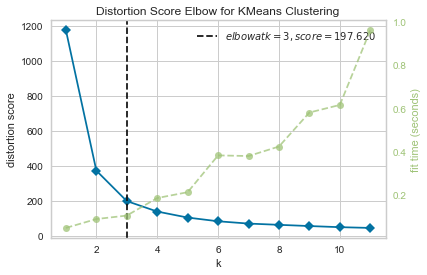

In [9]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

df2 = df

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(df2[feat_cols])      # Fit the data to the visualizer
visualizer.show()

Por tanto elegimos k=3. El número de clúster asignado se registra en una columna nueva C

In [10]:
k=3
model = KMeans(init='k-means++', n_clusters=k, n_init=10)
model.fit(df2[feat_cols])
df2["C"] = model.labels_

print("centers: ",end='')
print(model.n_clusters)
print(model.cluster_centers_, model.inertia_)
print("count per center")
print(len(df2[df2["C"]==0]),len(df2[df2["C"]==1]),len(df2[df2["C"]==2]))

centers: 3
[[0.64052883 0.59583844 0.61805196 0.01435074]
 [0.25240641 0.209458   0.23032423 0.01363501]
 [0.53734942 0.33096742 0.45169077 0.07025291]] 197.61957878149622
count per center
7088 2805 3127


In [33]:
acumulator=[]
for i in range(model.n_clusters):
    # print ("Centro ", end='')
    # print (i)
    acumulator.append(df2[df2["C"]==i].head())
acumulator

[         ID  DIA  HORA  TIMESTAMP   AFRISOL      CESA      DISS       PSA  \
 443  2-9.38    2  9.38          2  0.267393  0.257895  0.346707  0.278277   
 444   2-9.4    2  9.40          2  0.272596  0.264382  0.279177  0.294996   
 445  2-9.42    2  9.42          2  0.287654  0.280389  0.256137  0.312507   
 446  2-9.43    2  9.43          2  0.302159  0.293710  0.256536  0.324396   
 447  2-9.45    2  9.45          2  0.317272  0.305996  0.268327  0.345044   
 
           TSA    KONTAS      BSRN       max       min      mean       std  C  
 443  0.267393  0.267393  0.266008  0.346707  0.257895  0.278724  0.030557  0  
 444  0.272596  0.272596  0.258411  0.294996  0.258411  0.273536  0.011601  0  
 445  0.287654  0.287654  0.270066  0.312507  0.256137  0.283152  0.017470  0  
 446  0.302159  0.302159  0.288371  0.324396  0.256536  0.295641  0.020576  0  
 447  0.317272  0.317272  0.300775  0.345044  0.268327  0.310280  0.023180  0  ,
        ID  DIA  HORA  TIMESTAMP   AFRISOL      C

In [12]:
df2[df2["C"]==1]

,ID,DIA,HORA,TIMESTAMP,AFRISOL,CESA,DISS,PSA,TSA,KONTAS,BSRN,max,min,mean,std,C
443,2-9.38,2,9.38,2,0.267393,0.257895,0.346707,0.278277,0.267393,0.267393,0.266008,0.346707,0.257895,0.278724,0.030557,1
444,2-9.4,2,9.40,2,0.272596,0.264382,0.279177,0.294996,0.272596,0.272596,0.258411,0.294996,0.258411,0.273536,0.011601,1
445,2-9.42,2,9.42,2,0.287654,0.280389,0.256137,0.312507,0.287654,0.287654,0.270066,0.312507,0.256137,0.283152,0.017470,1
446,2-9.43,2,9.43,2,0.302159,0.293710,0.256536,0.324396,0.302159,0.302159,0.288371,0.324396,0.256536,0.295641,0.020576,1
447,2-9.45,2,9.45,2,0.317272,0.305996,0.268327,0.345044,0.317272,0.317272,0.300775,0.345044,0.268327,0.310280,0.023180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12464,30-13.73,30,13.73,30,0.151269,0.139362,0.152167,0.156032,0.158413,0.151269,0.151269,0.158413,0.139362,0.151397,0.006003,1
12465,30-13.75,30,13.75,30,0.150765,0.140730,0.151353,0.152753,0.158813,0.150765,0.150765,0.158813,0.140730,0.150849,0.005319,1
12466,30-13.77,30,13.77,30,0.154029,0.145571,0.154029,0.157301,0.159214,0.154029,0.154029,0.159214,0.145571,0.154029,0.004265,1
12467,30-13.78,30,13.78,30,0.159878,0.154166,0.170889,0.165800,0.159669,0.159878,0.159878,0.170889,0.154166,0.161451,0.005349,1


In [35]:
df2[df2["C"]==2].head()

,ID,DIA,HORA,TIMESTAMP,AFRISOL,CESA,DISS,PSA,TSA,KONTAS,BSRN,max,min,mean,std,C
419,1-15.98,1,15.98,1,0.483405,0.549452,0.483405,0.445298,0.483405,0.483405,0.455465,0.549452,0.445298,0.483405,0.033154,2
441,2-9.35,2,9.35,2,0.430063,0.347206,0.700622,0.305956,0.430063,0.430063,0.637028,0.700622,0.305956,0.468714,0.145972,2
442,2-9.37,2,9.37,2,0.288145,0.266991,0.755397,0.281560,0.288145,0.288145,0.315883,0.755397,0.266991,0.354895,0.177198,2
449,2-9.48,2,9.48,2,0.357021,0.334968,0.294892,0.397987,0.357021,0.357021,0.338109,0.397987,0.294892,0.348146,0.031174,2
450,2-9.5,2,9.50,2,0.370520,0.359196,0.309376,0.379991,0.370520,0.370520,0.372373,0.379991,0.309376,0.361785,0.023895,2


Unos gráficos de tarta nos ayudarán a entender la relación entre el clúster y las horas